# 시계열 데이터개요

- 시계열 데이터란
    - 시간의 흐름에 따라 수집된 데이터를 말한다.
    - 일반적으로는 시간의 간격이 균등한 **고정 빈도(fixed frequency)** 데이터가 대부분이지만 불규칙적인 데이터셋도 될 수 있다.                                    
    - 판다스는 날짜를 조작하고 다른 시구간에 대해 집계하고 다른 시간대를 샘플링 하는등의 시계열 데이터 분석을 위한 다양한 기능을 제공한다.

# 파이썬과 판다스의  날짜/시간 데이터 다루기

- **파이썬**은 `datetime` 모듈을 이용해 일시를 처리한다. datetime 모듈은 날짜/시간 관련 타입으로 `date, time, datetime` 세개의 클래스를 제공한다.
- **판다스**는 `Timestamp` 단일 타입으로 일시를 처리한다. `Timestamp`는 나노초(10억분의 1초)의 정밀도를 가진다.
- 파이썬, 판다스 모두 timedelta를 이용해 일시의 차이를 관리한다.

## 파이썬 datatime module
|클래스|설명|
|:-|-:|
|**date**|날짜타입 - 년/월/일을 저장|
|**time**|시간타입 - 시/분/초/마이크로초를 저장|
|**datetime**|날짜,시간을 저장|
|**timedelta**|두 datetime 간의 차이를 일/초/마이크로초로 표현|
|**tzinfo**|타임존-시간대-를 표현|

### 날짜 시간 객체 생성

In [7]:
import datetime  # datetime 모듈 import
d = datetime.date(year=2023, month=1, day=2)  # 날짜
t = datetime.time(hour=14, minute=40, second=20, microsecond=999999) # 시간
dt = datetime.datetime(year=2022, month=12, day=30, hour=11, minute=30, second=10, microsecond=999999)
# 마이크로 초: 1/100만 초
print(f"date: {d}\ntime: {t}\ndatetime: {dt}")
print(dt.year, dt.day, dt.second)

date: 2023-01-02
time: 14:40:20.999999
datetime: 2022-12-30 11:30:10.999999
2022 30 10


In [10]:
from datetime import datetime, time, date
# 실행시점의 날짜, 일시 조회
print('현재날짜:', date.today())
print('현재 일시:', datetime.now())

현재날짜: 2023-01-12
현재 일시: 2023-01-12 14:47:02.313633


### timedetla 를 이용한 계산
- datetime간의 간격을 표현한다.
    - 특정 날짜나 시간에서 일정 기간을 더하거나 뺀 일시를 계산할 때 사용
    - 날짜/시간 간의 차이를 계산한 결과로 사용 (두 일시간의 뺄셈의 결과)
    - 차이를 day, second, microsends로 표현한다.
    - 객체 생성시  weeks, days, hours, minutes, seconds, milliseconds, microseconds 를 넣어 차이를 표현한다.

In [17]:
from datetime import timedelta
tdelta = timedelta(days=1)  # 1일차
tdelta = timedelta(weeks=1) # 1주일차
tdelta = timedelta(weeks=2, days=3, hours=5, minutes=10, seconds=30, milliseconds=100, microseconds=100000)
c = datetime.now()
print(c)
print(c - tdelta)
print(c + tdelta)

2023-01-12 15:18:51.119370
2022-12-26 10:08:20.919370
2023-01-29 20:29:21.319370


In [19]:
date(2023, 1, 12) - date(2022, 1, 1) # 날짜 차이를 timedelta

datetime.timedelta(days=376)

In [20]:
datetime.now() - datetime(2022, 1, 1, 10, 20, 22)

datetime.timedelta(days=376, seconds=18002, microseconds=384577)

### datetime 과 문자열간 변환

- strftime()
    - datetime, date, time 객체를 지정한 형식의 문자열로 변환
- strptime()
    - 일시 형태의 문자열로 부터 datetime 객체를 생성한다.
- 요소를 나타내는 주요 형식문자
    - %Y, %m, %d : 년, 월, 일
    - %H, %M, %S : 시, 분, 초
    - https://docs.python.org/ko/3/library/datetime.html#strftime-and-strptime-format-codes

In [62]:
today = date.today()

# dow = ["월요일", "화요일"]
dow = list('월화수목금토일')
print(dow[today.weekday()])  # date.weekday(), datetime.weekday() => 요일을 정수반환 (0: 월, 6:일)


print(today)
print(today.strftime(f"%Y년 %m월 %d일 %a {dow[today.weekday()]}요일"))
curr = datetime.now()
print(curr)
print(curr.strftime('%Y/%m/%d %H, %I %p'))

목
2023-01-12
2023년 01월 12일 Thu 목요일
2023-01-12 16:12:17.065159
2023/01/12 16, 04 PM


In [28]:
s = "2000년 10월 30일"
#  문자열 -> datetime
datetime.strptime(s, "%Y년 %m월 %d일")

datetime.datetime(2000, 10, 30, 0, 0)

## 판다스 Timestamp
- 날짜 시간을 나노초(10억분의 1초) 단위의 정밀도로 표현한다.
- 다양한 방식으로 객체를 생성할 수 있다.
    - 직접 원하는 일시를 넣어 생성
    - 일시 형태의 문자열을 이용해 생성
    - unix time 부터 계산하여 생성 - 1970년 1월 1일 0시 0분 0초 0나노초


In [34]:
import pandas as pd
# 직접 원하는 일시를 넣어서 생성
pd.Timestamp(year=2020, month=11, day=21)
pd.Timestamp(year=2020, month=11, day=21, hour=17)
pd.Timestamp(year=2020, month=11, day=21, hour=17, minute=30)
pd.Timestamp(year=2020, month=11, day=21, hour=17, minute=30, second=10, microsecond=1, nanosecond=1)

Timestamp('2020-11-21 17:30:10.000001001')

In [39]:
# 문자열 생성 
# 날짜: `/`나 `-` 로 구분자를 사용, 시간: `:`을 구분자로 사용
pd.Timestamp('2023/1/2')
pd.Timestamp('2023/1/12 12:23')
pd.Timestamp('2023/1/12 12:23:30.1211')
pd.Timestamp('2023-1-12T12:23:30.1211')  #날짜와 시간 구분: 공백이나 T

Timestamp('2023-01-12 12:23:30.121100')

In [43]:
# 유닉스 타입을 기준으로 경과한 날짜.
pd.Timestamp(100)  # 100나노초 경과한 일시
pd.Timestamp(10, unit='Y') # 10년
pd.Timestamp(10, unit="M") # 10개월
pd.Timestamp(10, unit='W') # 10주

Timestamp('1970-03-12 00:00:00')

### to_datetime()
- 날짜와 관련된 다양한 값들을 Timestamp로 변환한다.
- Series나 리스트의 값들을 한번에 변환할 수 있다. 

In [65]:
s1 = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s1, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [ ]:
s2 = pd.Series(['2000-01-01', '2001-03-10', '2023-01-12', 'aklsdlsd']) 
result = pd.to_datetime(s2,
              errors='coerce') 
#errors: 변환못하는 문자열일 경우 어떻게 처리할지 지정. ignore-무시, coerce: NaT결측치 처리, raise:Exception발생-기본값 
result

In [78]:
s3 = pd.Series(['2000년 01월 01일', '2001년 03월 10일', '2023년 01월 12일']) 
pd.to_datetime(s3, format='%Y년 %m월 %d일') # parsing안되는 형식의 일시는 그 형식을 지정해 준다.

0   2000-01-01
1   2001-03-10
2   2023-01-12
dtype: datetime64[ns]

In [79]:
df = pd.read_csv('data/walmart_stock.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [80]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [83]:
df2 = df.copy()

In [84]:
# Date: object -> datetime 타입의 컬럼으로 변환
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [88]:
df2['Date'] = df2['Date'].astype("datetime64")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [89]:
df3 = pd.read_csv('data/walmart_stock.csv', parse_dates=[0])  # 0번째 컬럼은 datetime 타입으로 변환해라.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


### Timestamp 간 연산 및 TimeDelta
- element-wise  연산

In [92]:
s1 = pd.to_datetime(pd.Series(['2010-01-01', '2010-03-01', '2010-06-01']))
s2 = pd.to_datetime(pd.Series(['2012-01-01', '2012-03-01', '2012-06-01']))
s2.dtype

dtype('<M8[ns]')

In [94]:
result = s2 - s1 # 같은 index의 원소끼리의 날짜 차이 계산
result

0   730 days
1   731 days
2   731 days
dtype: timedelta64[ns]

In [95]:
result[0]

Timedelta('730 days 00:00:00')

In [99]:
# TimeDelta 객체 생성
# 간격: days, seconds, millseconds, microseconds, minutes, hours, weeks)
t_delta = pd.Timedelta(days=3)
t_delta = pd.Timedelta(weeks=2, days=3)
s1 + t_delta  # s1의 날짜에서 3일후 날짜를 계산 => element-wise 연산
s1 - t_delta

0   2009-12-15
1   2010-02-12
2   2010-05-15
dtype: datetime64[ns]

# 시계열 데이터셋

- 판다스에서 시계열 데이터셋의 가장 기본적인 형태는 Index가 datetime 타입인 Series나 DataFrame 객체이다.
    - DateTimeIndex: datetime 타입의 index 타입

In [12]:
from datetime import datetime
import pandas as pd
import numpy as np

dates = [
    datetime(2022, 1, 1),datetime(2022, 1, 2),
    datetime(2022, 1, 3),datetime(2022, 1, 4),
    datetime(2022, 2, 1),datetime(2022, 2, 2),
    datetime(2022, 2, 3),datetime(2022, 2, 4),
    datetime(2022, 3, 1),datetime(2022, 3, 2),
    datetime(2022, 3, 3),datetime(2022, 3, 4),
    datetime(2023, 1, 1),datetime(2023, 1, 2),
    datetime(2023, 1, 3),datetime(2023, 1, 4),
    datetime(2023, 2, 1),datetime(2023, 2, 2),
    datetime(2023, 2, 3),datetime(2023, 2, 4),
    datetime(2023, 3, 1),datetime(2023, 3, 2),
    datetime(2023, 3, 3),datetime(2023, 3, 4),
]
np.random.seed(0)
values = np.random.standard_normal(size=24)  # 표준정규분포(평균:0, 표준편차:1) 난수

s = pd.Series(values, index=dates)
s.info()
s

<class 'pandas.core.series.Series'>
DatetimeIndex: 24 entries, 2022-01-01 to 2023-03-04
Series name: None
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


2022-01-01    1.764052
2022-01-02    0.400157
2022-01-03    0.978738
2022-01-04    2.240893
2022-02-01    1.867558
2022-02-02   -0.977278
2022-02-03    0.950088
2022-02-04   -0.151357
2022-03-01   -0.103219
2022-03-02    0.410599
2022-03-03    0.144044
2022-03-04    1.454274
2023-01-01    0.761038
2023-01-02    0.121675
2023-01-03    0.443863
2023-01-04    0.333674
2023-02-01    1.494079
2023-02-02   -0.205158
2023-02-03    0.313068
2023-02-04   -0.854096
2023-03-01   -2.552990
2023-03-02    0.653619
2023-03-03    0.864436
2023-03-04   -0.742165
dtype: float64

In [2]:
s.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04'],
              dtype='datetime64[ns]', freq=None)

In [105]:
s.index[0]  #DateTimeIndex의 원소들은  Timestamp 타입.

Timestamp('2022-01-01 00:00:00')

## DatatimeIndex indexing 과 slicing
- Index가 Datetime 타입일 경우(DatetimeIndex) 날짜 시간의 각 요소들(ex: 년도, 월, 시간등등)을 이용해 다양한 조회가 가능하다.

In [3]:
# indexing - 문자열로 조회
# s[pd.Timestamp(2022, 1, 1)]
s['2022-01-02']

0.4001572083672233

In [5]:
# 부분일치 조회
s['2022']  # 2022년 원소들
s['2022-02'] # 2022년 2월 원소들

2022-02-01    1.867558
2022-02-02   -0.977278
2022-02-03    0.950088
2022-02-04   -0.151357
dtype: float64

In [23]:
s.index.year.isin([2022,2023])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [28]:
s[(s.index.month == 2) & s.index.year.isin([2022,2023])]

2022-02-01    1.867558
2022-02-02   -0.977278
2022-02-03    0.950088
2022-02-04   -0.151357
2023-02-01    1.494079
2023-02-02   -0.205158
2023-02-03    0.313068
2023-02-04   -0.854096
dtype: float64

In [29]:
s[s.index.day == 3]

2022-01-03    0.978738
2022-02-03    0.950088
2022-03-03    0.144044
2023-01-03    0.443863
2023-02-03    0.313068
2023-03-03    0.864436
dtype: float64

### slicing
- 부분 매칭(날짜/시간의 특정 요소만으로 매칭)으로 slicing이 가능하다.

In [7]:
s['2022-02-02':'2023-01-03']  #start, stop 포함.
s['2022-02-02':'2023-01-03':3]

2022-02-02   -0.977278
2022-03-01   -0.103219
2022-03-04    1.454274
2023-01-03    0.443863
dtype: float64

In [115]:
s['2022-01': '2022-02']
s['2022-01': '2023-02']  # 2022년 1월 1일 ~ 2023년 2월 28(마지막날)

2022-01-01    1.764052
2022-01-02    0.400157
2022-01-03    0.978738
2022-01-04    2.240893
2022-02-01    1.867558
2022-02-02   -0.977278
2022-02-03    0.950088
2022-02-04   -0.151357
2022-03-01   -0.103219
2022-03-02    0.410599
2022-03-03    0.144044
2022-03-04    1.454274
2023-01-01    0.761038
2023-01-02    0.121675
2023-01-03    0.443863
2023-01-04    0.333674
2023-02-01    1.494079
2023-02-02   -0.205158
2023-02-03    0.313068
2023-02-04   -0.854096
dtype: float64

In [116]:
s['2022':'2023']  #2022년 1월 1일 ~ 2023년 12월 31일

2022-01-01    1.764052
2022-01-02    0.400157
2022-01-03    0.978738
2022-01-04    2.240893
2022-02-01    1.867558
2022-02-02   -0.977278
2022-02-03    0.950088
2022-02-04   -0.151357
2022-03-01   -0.103219
2022-03-02    0.410599
2022-03-03    0.144044
2022-03-04    1.454274
2023-01-01    0.761038
2023-01-02    0.121675
2023-01-03    0.443863
2023-01-04    0.333674
2023-02-01    1.494079
2023-02-02   -0.205158
2023-02-03    0.313068
2023-02-04   -0.854096
2023-03-01   -2.552990
2023-03-02    0.653619
2023-03-03    0.864436
2023-03-04   -0.742165
dtype: float64

In [10]:
df = pd.read_csv('data/walmart_stock.csv', parse_dates=[0], index_col=0)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


In [118]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [119]:
df.loc['2012-01-03']

Open         5.997000e+01
High         6.106000e+01
Low          5.987000e+01
Close        6.033000e+01
Volume       1.266880e+07
Adj Close    5.261924e+01
Name: 2012-01-03 00:00:00, dtype: float64

In [121]:
df.loc['2012-01-03': '2012/01/20']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [122]:
df.loc['2012-01']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [125]:
df.loc['2012-01': '2012/02']
df.loc['2012-01': '2012/02': 5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-18,59.790001,60.029999,59.650002,60.009998,5911400,52.340131
2012-01-25,61.180000,61.610001,61.040001,61.470001,5915800,53.613531
2012-02-01,61.790001,62.630001,61.790001,62.180000,12130600,54.232785
2012-02-08,61.910000,62.020000,61.230000,61.619999,7260000,53.744358
2012-02-15,62.320000,62.439999,61.590000,61.759998,5833700,53.866464
2012-02-23,58.590000,58.900002,58.209999,58.540001,14880300,51.058014


## DateOffsets
- 빈도를 표현하는 타입이다.
- DateOffsets 타입 객체나 문자 별칭을 이용하여 빈도간격을 표현한다.
    - 타입: https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects
    - 별칭: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

### DateOffset 이용 메소드
- **pd.date_range()**
    - 동일한 간격 일시로 구성된(고정빈도)의 DatetimeIndex 생성한다.
    - DatetimeIndex
        - 일시 타입의 Index
    - 주요 매개변수
        - start: str 또는 datetime 형식 - 시작 날짜
        - end: str 또는 datetime 형식 - 종료 날짜
        - period:  생성할 개수
            - start에서 end까지 periods에 지정한 개수에 맞춰 등분한 날짜로 구성된 DatetimeIndex를 반환한다.
            - end 대신 period로 
        - freq: str 또는 DateOffsets - 빈도 기준
            - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
        - periods와 freq는 둘중 하나만 사용한다. 둘다 생략하면 **일별**로 생성한다.

- **first(offset)**
    - offset 빈도의 앞의 N개 행을 조회한다.

In [35]:
# date_range()

import pandas as pd

pd.date_range(start='2022-01', end='2022-02') #default 간격:  날짜기준
pd.date_range(start='2022-01', end='2022-02', periods=3) # 3등분한 분위의 날짜
pd.date_range(start='2022-01', periods=3)
pd.date_range(start='2022-01', periods=3, freq='y') # y: YearEnd
pd.date_range(start='2022-01', periods=3, freq='ys')# ys: YearStart
pd.date_range(start='2022-01', periods=3, freq='3ys') # 3ys: 3년

DatetimeIndex(['2022-01-01', '2025-01-01', '2028-01-01'], dtype='datetime64[ns]', freq='3AS-JAN')

In [47]:
# pd.date_range('2000', '2023', freq='5y')
# pd.date_range('2000', '2023', freq='5ys')
# pd.date_range('2000', '2023', freq='m')
pd.date_range('2000', '2023', freq='MS')  #ms: 밀리초
pd.date_range('2022-01-01', '2022-02', freq='H')

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-01-31 15:00:00', '2022-01-31 16:00:00',
               '2022-01-31 17:00:00', '2022-01-31 18:00:00',
               '2022-01-31 19:00:00', '2022-01-31 20:00:00',
               '2022-01-31 21:00:00', '2022-01-31 22:00:00',
               '2022-01-31 23:00:00', '2022-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='H')

In [51]:
pd.date_range('2023-01-01', '2023-01-12', freq='B')
pd.date_range('2000', '2023', freq='Q')
pd.date_range('2000', '2023', freq='QS')

DatetimeIndex(['2000-01-01', '2000-04-01', '2000-07-01', '2000-10-01',
               '2001-01-01', '2001-04-01', '2001-07-01', '2001-10-01',
               '2002-01-01', '2002-04-01', '2002-07-01', '2002-10-01',
               '2003-01-01', '2003-04-01', '2003-07-01', '2003-10-01',
               '2004-01-01', '2004-04-01', '2004-07-01', '2004-10-01',
               '2005-01-01', '2005-04-01', '2005-07-01', '2005-10-01',
               '2006-01-01', '2006-04-01', '2006-07-01', '2006-10-01',
               '2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
      

In [53]:
pd.date_range('2020', '2023', freq='W-TUE')  #'W': 일요일 'W-요일'

DatetimeIndex(['2020-01-07', '2020-01-14', '2020-01-21', '2020-01-28',
               '2020-02-04', '2020-02-11', '2020-02-18', '2020-02-25',
               '2020-03-03', '2020-03-10',
               ...
               '2022-10-25', '2022-11-01', '2022-11-08', '2022-11-15',
               '2022-11-22', '2022-11-29', '2022-12-06', '2022-12-13',
               '2022-12-20', '2022-12-27'],
              dtype='datetime64[ns]', length=156, freq='W-TUE')

In [54]:
# 시리즈의 값으로 사용.
pd.Series(pd.date_range('2020', '2023', freq='W-TUE') )

0     2020-01-07
1     2020-01-14
2     2020-01-21
3     2020-01-28
4     2020-02-04
         ...    
151   2022-11-29
152   2022-12-06
153   2022-12-13
154   2022-12-20
155   2022-12-27
Length: 156, dtype: datetime64[ns]

In [66]:
s = pd.Series(range(455), 
              index=pd.date_range('2023/01/01', '2023/01/01 23:59:59', freq='3T10S'))  # T 분  (3분 10초))
s

2023-01-01 00:00:00      0
2023-01-01 00:03:10      1
2023-01-01 00:06:20      2
2023-01-01 00:09:30      3
2023-01-01 00:12:40      4
                      ... 
2023-01-01 23:45:00    450
2023-01-01 23:48:10    451
2023-01-01 23:51:20    452
2023-01-01 23:54:30    453
2023-01-01 23:57:40    454
Freq: 190S, Length: 455, dtype: int64

In [70]:
# first()
s.first('900S')
s.first('20T')
s.first('3H')

2023-01-01 00:00:00     0
2023-01-01 00:03:10     1
2023-01-01 00:06:20     2
2023-01-01 00:09:30     3
2023-01-01 00:12:40     4
2023-01-01 00:15:50     5
2023-01-01 00:19:00     6
2023-01-01 00:22:10     7
2023-01-01 00:25:20     8
2023-01-01 00:28:30     9
2023-01-01 00:31:40    10
2023-01-01 00:34:50    11
2023-01-01 00:38:00    12
2023-01-01 00:41:10    13
2023-01-01 00:44:20    14
2023-01-01 00:47:30    15
2023-01-01 00:50:40    16
2023-01-01 00:53:50    17
2023-01-01 00:57:00    18
2023-01-01 01:00:10    19
2023-01-01 01:03:20    20
2023-01-01 01:06:30    21
2023-01-01 01:09:40    22
2023-01-01 01:12:50    23
2023-01-01 01:16:00    24
2023-01-01 01:19:10    25
2023-01-01 01:22:20    26
2023-01-01 01:25:30    27
2023-01-01 01:28:40    28
2023-01-01 01:31:50    29
2023-01-01 01:35:00    30
2023-01-01 01:38:10    31
2023-01-01 01:41:20    32
2023-01-01 01:44:30    33
2023-01-01 01:47:40    34
2023-01-01 01:50:50    35
2023-01-01 01:54:00    36
2023-01-01 01:57:10    37
2023-01-01 0

## 데이터 shift
- DatetimeIndex의 index는 그대로 두고 데이터를 앞 또는 뒤로 이동시킨다.
- DataFrame/Series객체.shift() 이용
    - 매개변수
        - periods=1 : 이동할 기간 (기본값 1)
        - freq: 이동시킬 날짜/시간의 단위. DateOffset 객체/alias, timedelta
        

In [71]:
s = pd.Series(range(10, 15), index=pd.date_range('2022/01/01', '2022/01/05'))
s

2022-01-01    10
2022-01-02    11
2022-01-03    12
2022-01-04    13
2022-01-05    14
Freq: D, dtype: int64

In [72]:
s.shift(2)

2022-01-01     NaN
2022-01-02     NaN
2022-01-03    10.0
2022-01-04    11.0
2022-01-05    12.0
Freq: D, dtype: float64

In [73]:
s.shift(-2)

2022-01-01    12.0
2022-01-02    13.0
2022-01-03    14.0
2022-01-04     NaN
2022-01-05     NaN
Freq: D, dtype: float64

In [74]:
s

2022-01-01    10
2022-01-02    11
2022-01-03    12
2022-01-04    13
2022-01-05    14
Freq: D, dtype: int64

In [77]:
s.shift(freq='3MS')

2022-04-01    10
2022-04-01    11
2022-04-01    12
2022-04-01    13
2022-04-01    14
dtype: int64

In [78]:
s

2022-01-01    10
2022-01-02    11
2022-01-03    12
2022-01-04    13
2022-01-05    14
Freq: D, dtype: int64

In [83]:
# 전날 대비 값이 어떻게 변화했는지?
(s/s.shift(1) - 1)* 100

2022-01-01          NaN
2022-01-02    10.000000
2022-01-03     9.090909
2022-01-04     8.333333
2022-01-05     7.692308
Freq: D, dtype: float64

## resample()을 이용한 집계
- resample()은 시계열 데이터를 지정한 구간별로 나눠서 집계할 수 있도록 grouping 한다.
- groupby() 로 묶을 수도 있지만 DatetimeIndex의 경우 resample이 더 편리하다.
    - 매개변수
        - rule: group으로 묶을 기준을 offset으로 지정한다.
        - closed : "left" 또는 "right" - 간격의 시작과 끝중 어느부분을 포함시킬지(닫을지)를 설정. "left"가 기본으로 왼쪽은 포함하고 오른쪽은 포함되지 않는다.
        - on : 기준 컬럼을 지정한다. Index가 아니라 datetime 타입의 열(컬럼)을 기준으로 resample 할 때 사용

In [1]:
s = pd.Series(range(1, 21), 
             index=pd.date_range('2000/01', periods=20, freq='T')) # 분 단위로 20개 값
s

NameError: name 'pd' is not defined

In [86]:
s.mean()

10.5

In [93]:
s.resample('10T')  # 10분 기준을 group을 나눈다.
s.resample('10T').mean()   # closed=left(기본) :   [00:00 ~ 10:00), [10:00 ~ 20:00), [20:00 ~ 30) ....
s.resample('10T', closed='right').mean()   # (50 ~ 00], (00 ~ 10], (10 ~ 20]  # 둘다 시작을 inde로 사용
s.resample('10T', closed='right').sum()

1999-12-31 23:50:00      1
2000-01-01 00:00:00     65
2000-01-01 00:10:00    144
Freq: 10T, dtype: int64

In [97]:
d = s.to_frame().reset_index()
d.columns = ['time', 'cnt']  # 날짜 시간 타입의 컬럼.(index X)
d

,time,cnt
0,2000-01-01 00:00:00,1
1,2000-01-01 00:01:00,2
2,2000-01-01 00:02:00,3
3,2000-01-01 00:03:00,4
4,2000-01-01 00:04:00,5
5,2000-01-01 00:05:00,6
6,2000-01-01 00:06:00,7
7,2000-01-01 00:07:00,8
8,2000-01-01 00:08:00,9
9,2000-01-01 00:09:00,10


In [100]:
d.resample('5t', on='time')['cnt'].sum()  # on으로 datetime타입 컬럼을 지정.
d.resample('5t', on='time')['cnt'].agg(['mean', 'sum'])

,mean,sum
time,,
2000-01-01 00:00:00,3.0,15
2000-01-01 00:05:00,8.0,40
2000-01-01 00:10:00,13.0,65
2000-01-01 00:15:00,18.0,90


In [101]:
df = pd.read_csv('data/walmart_stock.csv', parse_dates=[0], index_col=0)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [105]:
df.resample('Y')['Close'].mean()
df.resample('6M')['Close'].mean()
df.resample('Q')['Close'].mean()

Date
2012-03-31    60.519516
2012-06-30    63.057143
2012-09-30    73.174921
2012-12-31    72.079839
2013-03-31    71.026000
2013-06-30    76.885781
2013-09-30    75.629063
2013-12-31    77.472813
2014-03-31    75.337213
2014-06-30    77.066508
2014-09-30    75.748593
2014-12-31    81.059844
2015-03-31    85.107213
2015-06-30    76.492540
2015-09-30    68.825313
2015-12-31    60.193281
2016-03-31    65.776557
2016-06-30    69.438437
2016-09-30    72.782812
2016-12-31    70.021111
Freq: Q-DEC, Name: Close, dtype: float64

In [2]:
import pandas as pd
df = pd.read_csv('data/walmart_stock.csv', parse_dates=True, index_col=0)

In [111]:
df.groupby(pd.Grouper(freq='Q'))['Close'].mean()
df.groupby([pd.Grouper(freq='Q'), 'Volume'])['Close'].mean()

Date        Volume  
2012-03-31  4175000     61.790001
            5173100     62.220001
            5480600     61.880001
            5501000     61.900002
            5710800     60.650002
                          ...    
2016-12-31  14321300    71.389999
            16779500    71.099998
            17844800    70.980003
            20110300    69.360001
            23440300    69.190002
Name: Close, Length: 1258, dtype: float64

##  기간 이동 집계
- 현재값을 기준으로 N개씩 묶어서 집계를 한다.
    - 예) 이동평균 구하기
- rolling(window, min_periods=None)    
    - window: 범위. 정수
    - min_periods: 집계할 최소 개수. 생략하면 window size로 지정.
    - center: bool - 집계결과를 window의 중간에 둘지 여부. 기본값은 False로 레이블이 창 맨 뒤에 둔다. 

In [113]:
df['Close'].head(60)

Date
2012-01-03    60.330002
2012-01-04    59.709999
2012-01-05    59.419998
2012-01-06    59.000000
2012-01-09    59.180000
2012-01-10    59.040001
2012-01-11    59.400002
2012-01-12    59.500000
2012-01-13    59.540001
2012-01-17    59.849998
2012-01-18    60.009998
2012-01-19    60.610001
2012-01-20    61.009998
2012-01-23    60.910000
2012-01-24    61.389999
2012-01-25    61.470001
2012-01-26    60.970001
2012-01-27    60.709999
2012-01-30    61.299999
2012-01-31    61.360001
2012-02-01    62.180000
2012-02-02    61.939999
2012-02-03    62.029999
2012-02-06    61.880001
2012-02-07    61.689999
2012-02-08    61.619999
2012-02-09    61.959999
2012-02-10    61.900002
2012-02-13    61.790001
2012-02-14    62.220001
2012-02-15    61.759998
2012-02-16    62.040001
2012-02-17    62.480000
2012-02-21    60.070000
2012-02-22    58.599998
2012-02-23    58.540001
2012-02-24    58.790001
2012-02-27    58.459999
2012-02-28    58.930000
2012-02-29    59.080002
2012-03-01    58.820000
2012-03-02 

In [3]:
# 종가의 5일 이동 평균
moving_avg = df['Close'].rolling(window=5).mean()
moving_avg2 = df['Close'].rolling(window=20).mean()  # 20일 이동 평균
moving_avg.head(60)
moving_avg2.head(60)

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11          NaN
2012-01-12          NaN
2012-01-13          NaN
2012-01-17          NaN
2012-01-18          NaN
2012-01-19          NaN
2012-01-20          NaN
2012-01-23          NaN
2012-01-24          NaN
2012-01-25          NaN
2012-01-26          NaN
2012-01-27          NaN
2012-01-30          NaN
2012-01-31    60.235500
2012-02-01    60.328000
2012-02-02    60.439500
2012-02-03    60.570000
2012-02-06    60.714000
2012-02-07    60.839500
2012-02-08    60.968500
2012-02-09    61.096500
2012-02-10    61.216500
2012-02-13    61.329000
2012-02-14    61.447500
2012-02-15    61.535000
2012-02-16    61.606500
2012-02-17    61.680000
2012-02-21    61.638000
2012-02-22    61.498500
2012-02-23    61.352000
2012-02-24    61.243000
2012-02-27    61.130500
2012-02-28    61.012000
2012-02-29    60.898000
2012-03-01    60.730000
2012-03-02 

In [118]:
moving_avg3 = df['Close'].rolling(window=20, min_periods=3).mean() 
moving_avg3

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05    59.820000
2012-01-06    59.615000
2012-01-09    59.528000
                ...    
2016-12-23    70.825000
2016-12-27    70.750500
2016-12-28    70.647499
2016-12-29    70.588999
2016-12-30    70.511500
Name: Close, Length: 1258, dtype: float64

In [121]:
df['Close'].rolling(window=20, center=True).mean().head(60)

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11          NaN
2012-01-12          NaN
2012-01-13          NaN
2012-01-17          NaN
2012-01-18    60.235500
2012-01-19    60.328000
2012-01-20    60.439500
2012-01-23    60.570000
2012-01-24    60.714000
2012-01-25    60.839500
2012-01-26    60.968500
2012-01-27    61.096500
2012-01-30    61.216500
2012-01-31    61.329000
2012-02-01    61.447500
2012-02-02    61.535000
2012-02-03    61.606500
2012-02-06    61.680000
2012-02-07    61.638000
2012-02-08    61.498500
2012-02-09    61.352000
2012-02-10    61.243000
2012-02-13    61.130500
2012-02-14    61.012000
2012-02-15    60.898000
2012-02-16    60.730000
2012-02-17    60.583500
2012-02-21    60.452000
2012-02-22    60.306500
2012-02-23    60.215000
2012-02-24    60.122500
2012-02-27    60.028500
2012-02-28    59.967500
2012-02-29    59.928000
2012-03-01    59.871000
2012-03-02 

In [7]:
v = moving_avg2.first('Y')  #20일 이동평균
v2 = df['Close'].first('Y') #원래 데이터

In [5]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 27.2 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.6-cp39-cp39-win_amd64.whl (161 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.5/2.5 MB 53.0 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)


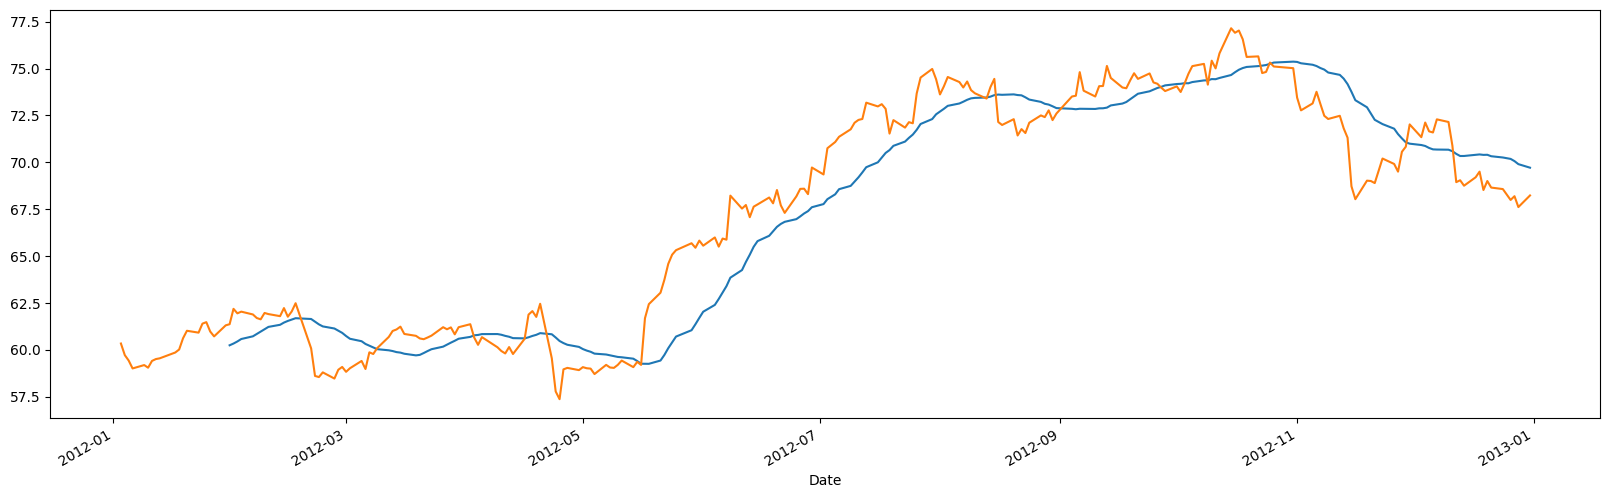

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
v.plot()
v2.plot()
plt.show()


In [128]:
v2

Date
2012-01-03    60.330002
2012-01-04    59.709999
2012-01-05    59.419998
2012-01-06    59.000000
2012-01-09    59.180000
                ...    
2012-12-24    68.570000
2012-12-26    67.989998
2012-12-27    68.190002
2012-12-28    67.610001
2012-12-31    68.230003
Name: Close, Length: 250, dtype: float64